# Submission
Perkenal kan saya Muhammad Farrel sedang mengikuti Dicoding Machine Learning untuk Pemula

email : farrelmuhammad0410@gmail.com

In [1]:
import tensorflow as tf
import sklearn
import zipfile, os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-08 09:08:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.94MB/s    in 62s     

2020-10-08 09:09:19 (4.95 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

Augmentasi dan Generarator

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4  #Data validasi buat menjadi 40%
)

In [5]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [6]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150), 
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Model CNN

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 39s - loss: 1.0356 - accuracy: 0.4850 - val_loss: 0.7886 - val_accuracy: 0.6687
Epoch 2/20
25/25 - 42s - loss: 0.5244 - accuracy: 0.8013 - val_loss: 0.5013 - val_accuracy: 0.8125
Epoch 3/20
25/25 - 39s - loss: 0.3663 - accuracy: 0.8675 - val_loss: 0.3018 - val_accuracy: 0.8625
Epoch 4/20
25/25 - 39s - loss: 0.2544 - accuracy: 0.9125 - val_loss: 0.2752 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 39s - loss: 0.1911 - accuracy: 0.9337 - val_loss: 0.1550 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 39s - loss: 0.1668 - accuracy: 0.9425 - val_loss: 0.2848 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 38s - loss: 0.1540 - accuracy: 0.9468 - val_loss: 0.4153 - val_accuracy: 0.8250
Epoch 8/20
25/25 - 38s - loss: 0.1981 - accuracy: 0.9416 - val_loss: 0.2554 - val_accuracy: 0.8813
Epoch 9/20
25/25 - 39s - loss: 0.1389 - accuracy: 0.9563 - val_loss: 0.1997 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 39s - loss: 0.1410 - accuracy: 0.9463 - val_loss: 0.1744 - val_accuracy: 0.9500
Epoch 11/

Cek Overfittning atau tidak

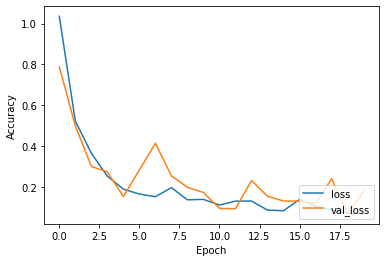

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Saving S__24150020.jpg to S__24150020.jpg
S__24150020.jpg
paper


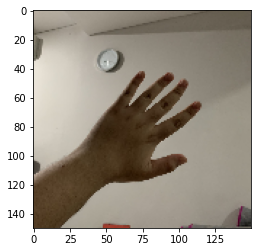

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('Not Defined')